<a href="https://colab.research.google.com/github/yongkgu/Computer_Vision/blob/main/Homography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


## **Practice – Homography estimation**

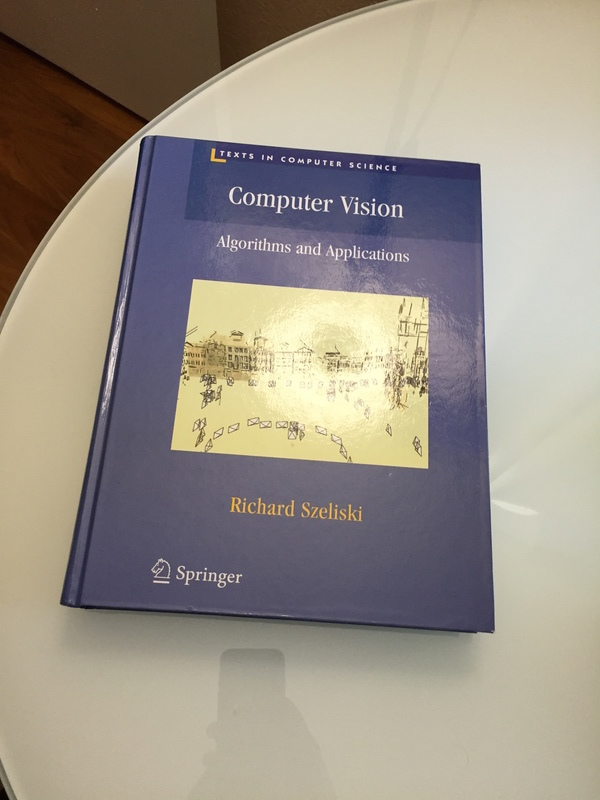

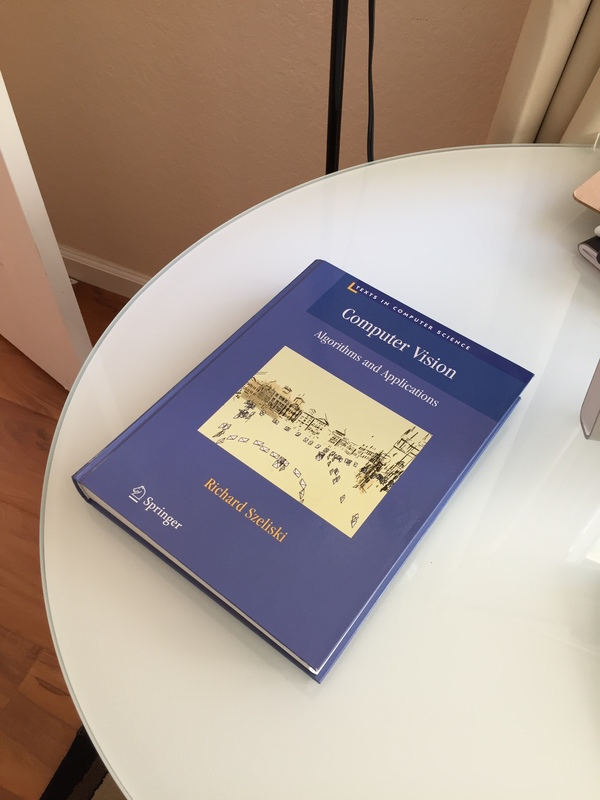

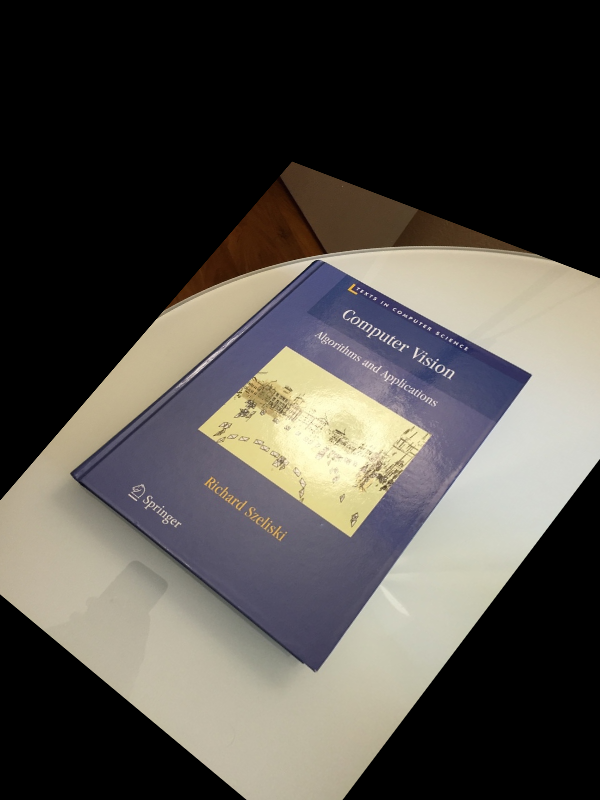

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow
# Read source image.
im = cv.imread('gdrive/MyDrive/MachineVision/book2.jpg')
# Four corners of the book in source image
x = np.array([[141,131,1], [480,159,1], [493,630,1],[64,601,1]])
# Read destination image.
im_ = cv.imread('gdrive/MyDrive/MachineVision/book1.jpg')
# Four corners of the book in destination image.
x_ = np.array([[318,256,1],[534,372,1],[316,670,1],[73,473,1]])

# Calculate Homography
A1 = np.hstack((np.zeros((len(x_),3)),-np.expand_dims(x_[:,2],axis=1)*x,np.expand_dims(x_[:,1],axis=1)*x))
A2 = np.hstack((np.expand_dims(x_[:,2],axis=1)*x,np.zeros((len(x_),3)),-np.expand_dims(x_[:,0],axis=1)*x))
A = np.vstack((A1, A2))
u, s, vh = np.linalg.svd(A, full_matrices=True)
h = vh[-1,:]/vh[-1,-1];
h = np.reshape(h,(3,3))
# h_, status = cv.findHomography(x, x_)
# Warp source image to destination based on homography
im_out = cv.warpPerspective(im, h, (im_.shape[1],im_.shape[0]))
# Display images
cv_imshow(im), cv_imshow(im_), cv_imshow(im_out)




In [ ]:
x_ = np.array([[0, 0],[299, 0],[299, 399],[0, 399]])
im_out = cv.warpPerspective(im, h, (300,400))

## **Homography estimation**


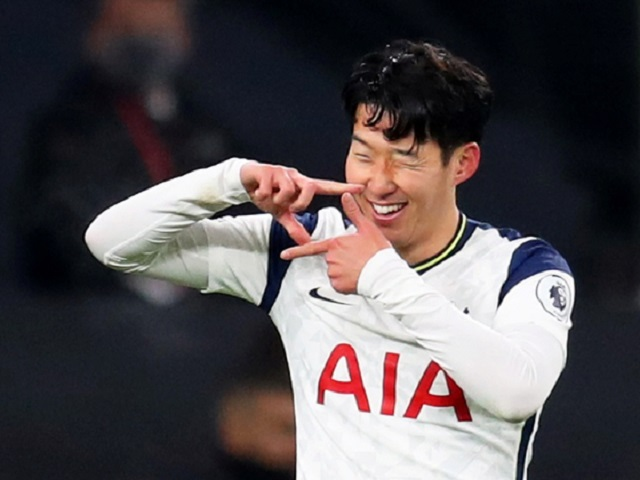

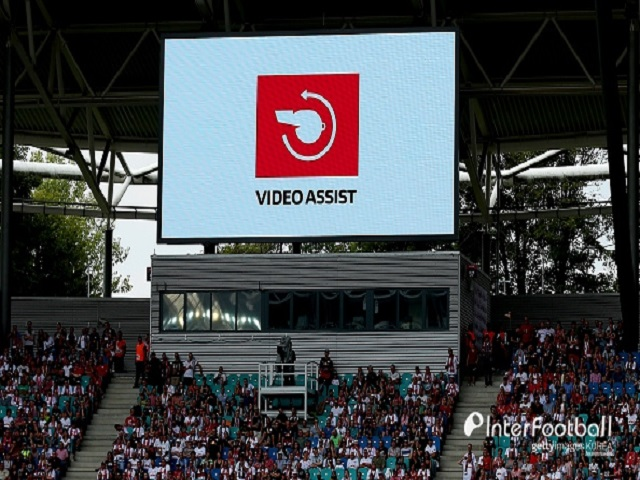

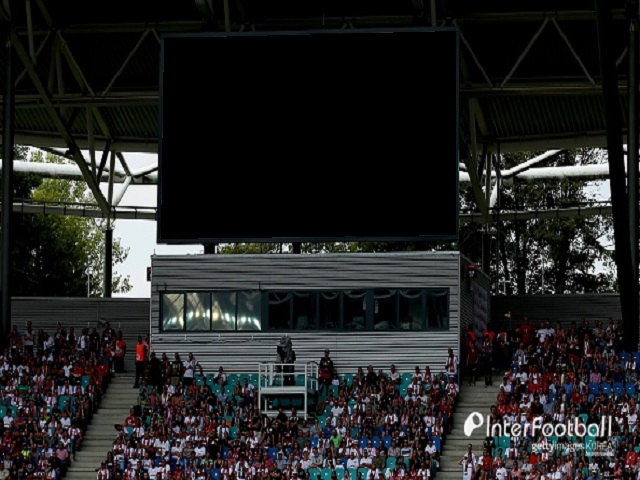

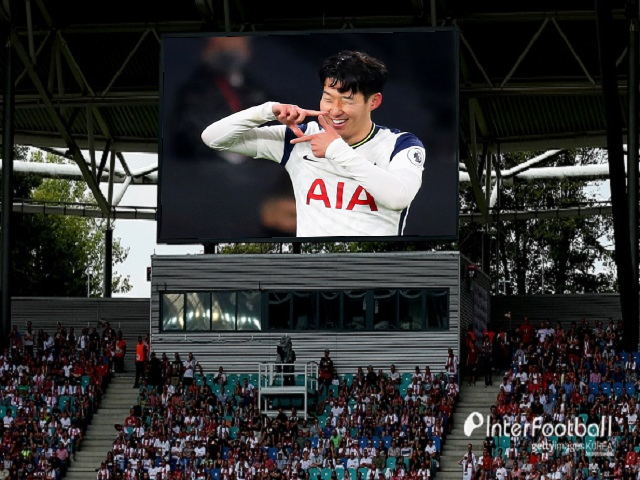

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow
# Read images and points
im_src = cv.imread('gdrive/MyDrive/MachineVision/super_son.jpg');
size = im_src.shape
pts_src = np.array([[0,0,1],[size[1]-1,0,1],[size[1]-1,size[0]-1,1],[0,size[0]-1,1]]);
im_dst = cv.imread('gdrive/MyDrive/MachineVision/back.jpg');
ori_dst = cv.imread('gdrive/MyDrive/MachineVision/back.jpg');
pts_dst = np.array([[164,38,1],[455,31,1],[455,234,1],[161,238,1]]);

# Calculate Homography between source and destination points
A1 = np.hstack((np.zeros((len(pts_dst),3)),-np.expand_dims(pts_dst[:,2],axis=1)*pts_src,np.expand_dims(pts_dst[:,1],axis=1)*pts_src))
A2 = np.hstack((np.expand_dims(pts_dst[:,2],axis=1)*pts_src,np.zeros((len(pts_dst),3)),-np.expand_dims(pts_dst[:,0],axis=1)*pts_src))
A = np.vstack((A1, A2))
u, s, vh = np.linalg.svd(A, full_matrices=True)
h = vh[-1,:]/vh[-1,-1];
h = np.reshape(h,(3,3))

# Warp source image
im_temp = cv.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))
# Black out polygonal area in destination image.
cv.fillConvexPoly(im_dst, pts_dst[:,[0,1]].astype(int), 0);
# Add warped source image to destination image.
im_dst_2 = im_dst + im_temp;
# Display image.
cv_imshow(im_src)
cv_imshow(ori_dst)
cv_imshow(im_dst)
cv_imshow(im_dst_2);



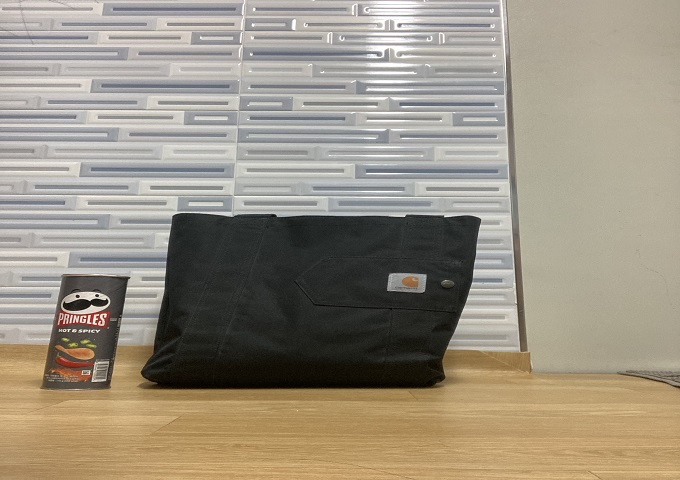

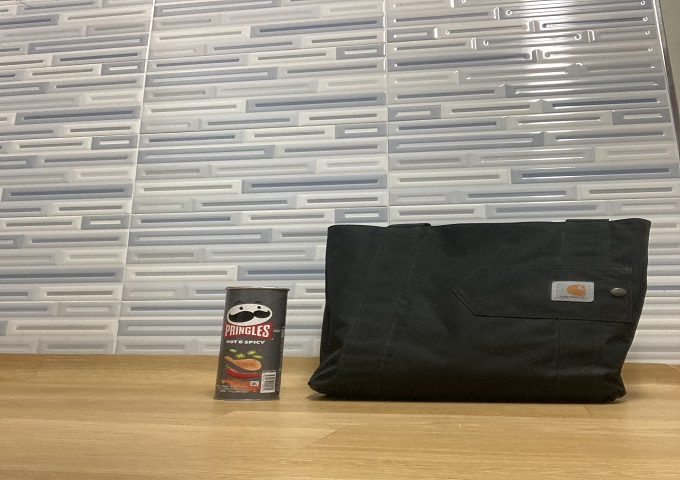

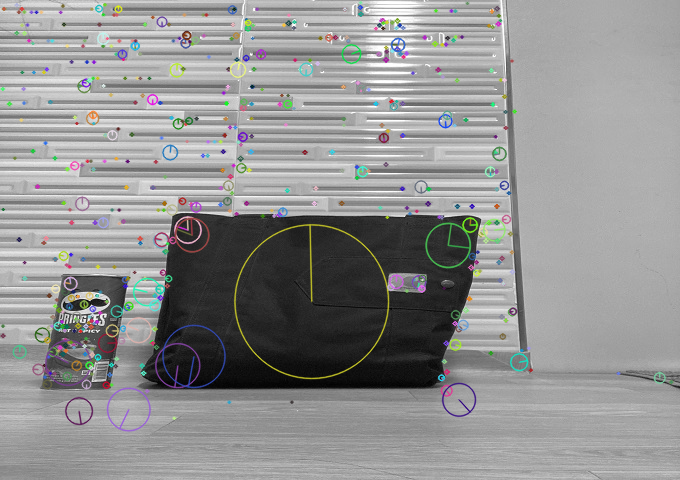

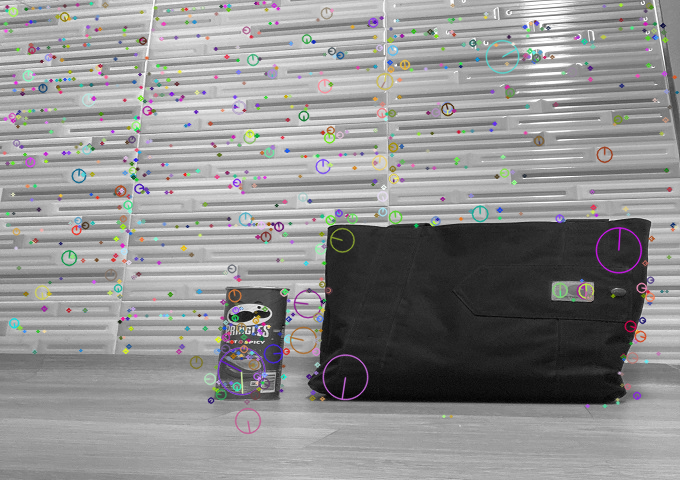

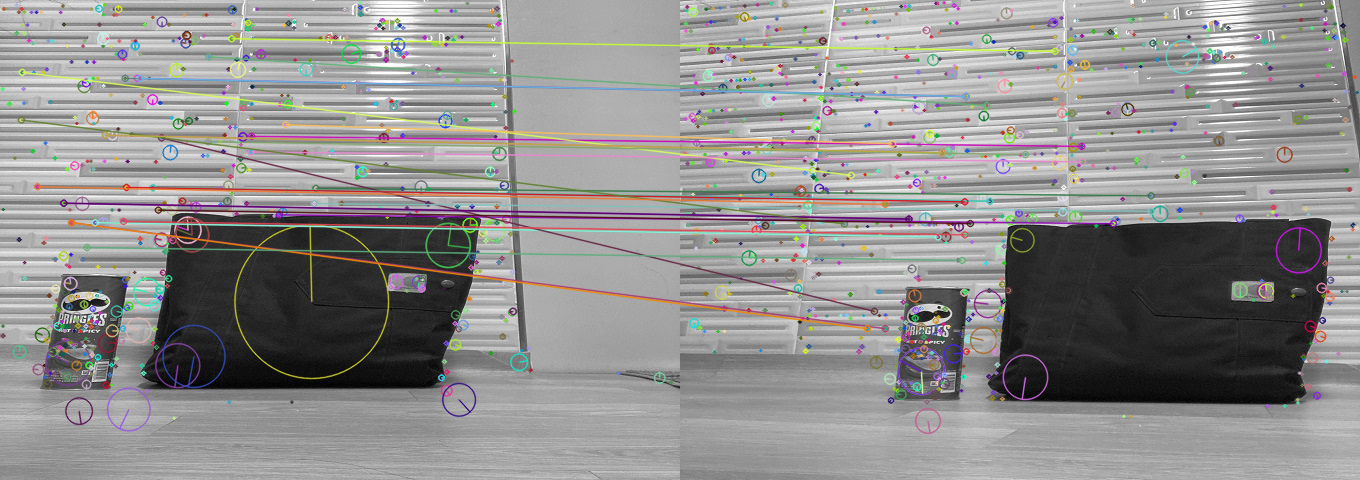

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow
import subprocess
subprocess.call("pip install -U opencv-python".split())

img = cv.imread('gdrive/MyDrive/MachineVision/sharing_center1.jpg')
img2 = cv.imread('gdrive/MyDrive/MachineVision/sharing_center2.jpg')
img_ori = cv.imread('gdrive/MyDrive/MachineVision/sharing_center1.jpg')
img2_ori = cv.imread('gdrive/MyDrive/MachineVision/sharing_center2.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray2= cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
sift2 = cv.SIFT_create()

kp, des = sift.detectAndCompute(img,None)
kp2, des2 = sift.detectAndCompute(img2,None)

img_blob = cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_blob = cv.drawKeypoints(gray2,kp2,img2,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Match descriptors.
bf = cv.BFMatcher()
matches = bf.match(des,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 30 matches.
img3 = cv.drawMatches(img, kp, img2, kp2, matches[:30], None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv_imshow(img_ori)
cv_imshow(img2_ori)
cv_imshow(img_blob)
cv_imshow(img2_blob)
cv_imshow(img3)

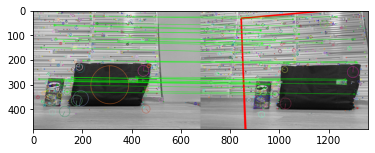

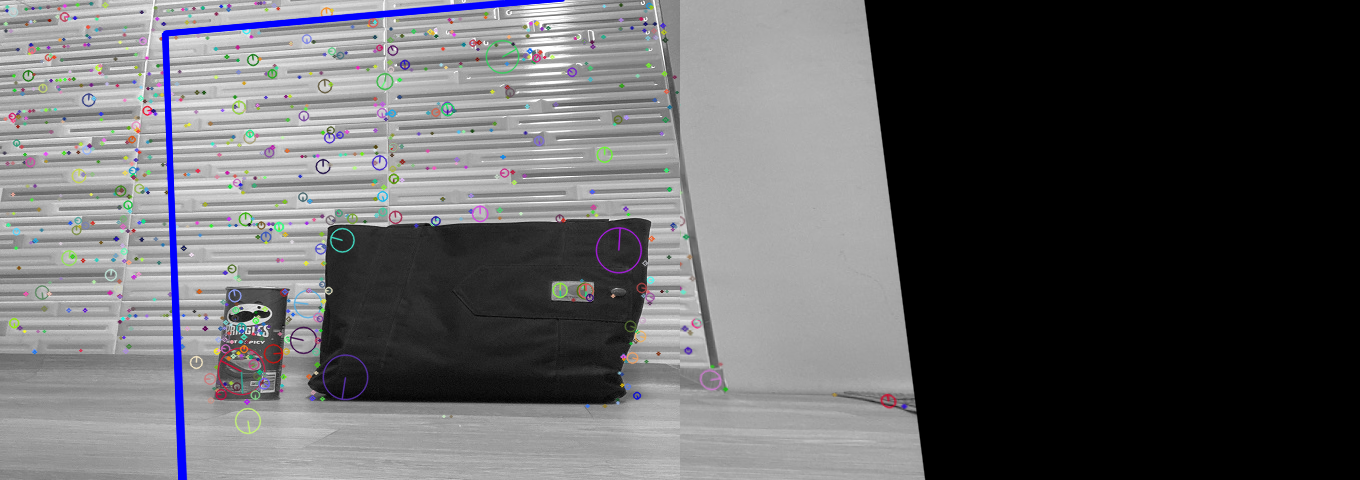

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

img1 = img_blob
img2 = img2_blob

# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w,z = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    matchesMask = None

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.imshow(img3, 'gray'),plt.show()

im_out = cv.warpPerspective(img1, M, (img1.shape[1] + img1.shape[1], img1.shape[0]))
im_out[0:img1.shape[0], 0:img1.shape[1]] = img2
cv_imshow(im_out)

